In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Data Preprocessing

In [10]:
# Reshaping data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # reshape(batch_size, height, width, channel(color))
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) # reshape(batch_size, height, width, channel(color))
input_shape = (28, 28, 1)

# Normalize the pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Preprocessed training labels shape: {y_train.shape}")

Preprocessed training labels shape: (60000, 10)


# Building CNN Model

In [2]:
# Export trained model for backend API
import os
os.makedirs('backend', exist_ok=True)
model.save('backend/model.h5')
print('Saved to backend/model.h5')


NameError: name 'model' is not defined

In [11]:
model = Sequential([
    # Convolutional Block 1
    Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),
    MaxPooling2D(pool_size = (2, 2)),

    # Convolutional Block 2
    Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape),
    
    MaxPooling2D(pool_size = (2, 2)),

    # Flatten and Classify
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5), # Regularization to prevent overfitting
    Dense(10, activation = 'softmax')
])

model.summary()

c:\Users\SUYASH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and Training the model

In [12]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the model
history = model.fit(x_train, y_train, batch_size = 128, epochs = 15, validation_split = 0.1) # Use 10% of the training data for validation

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose = 0)

print(f"\nTest loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7998 - loss: 0.6402 - val_accuracy: 0.9792 - val_loss: 0.0669
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9682 - loss: 0.1089 - val_accuracy: 0.9863 - val_loss: 0.0486
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9742 - loss: 0.0824 - val_accuracy: 0.9890 - val_loss: 0.0377
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9810 - loss: 0.0646 - val_accuracy: 0.9897 - val_loss: 0.0364
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9836 - loss: 0.0520 - val_accuracy: 0.9900 - val_loss: 0.0339
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9892 - val_loss: 0.0395
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9875 - loss: 0.0428 - val_accuracy: 0.9902 - val_loss: 0.0341
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9888 - loss: 0.0381 - val_acc

In [13]:
import os
os.makedirs('backend', exist_ok=True)
model.save('backend/model.h5')

# Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

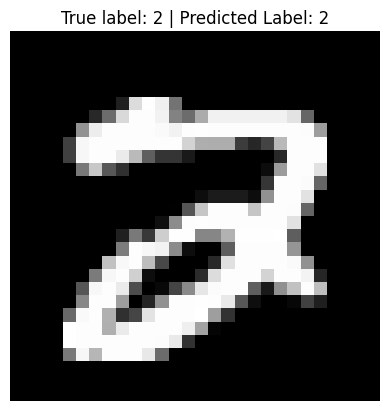

In [13]:
# Select an image from the test set
image_index = 9980
test_image = x_test[image_index]
true_label = np.argmax(y_test[image_index])

# Get the true digit
image_for_prediction = np.expand_dims(test_image, axis = 0)

# Make a predicition
prediction = model.predict(image_for_prediction)

predicted_label = np.argmax(prediction)

# Display the results
plt.imshow(test_image.squeeze(), cmap = 'gray')
plt.title(f"True label: {true_label} | Predicted Label: {predicted_label}")
plt.axis('off')
plt.show

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


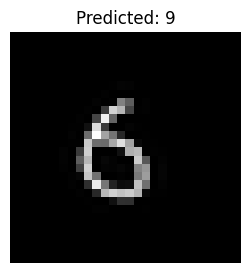

In [31]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os


def preprocess_digit_image(image_path: str):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Not found: {image_path}")

    # Load and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Auto-invert if background appears white (MNIST expects white digit on black bg)
    np_img = np.array(img)
    if np.mean(np_img) > 127:
        img = ImageOps.invert(img)

    # Improve contrast a bit
    img = ImageOps.autocontrast(img)

    # Fit image into a 28x28 canvas, keeping aspect ratio
    img.thumbnail((28, 28), Image.LANCZOS)
    canvas = Image.new('L', (28, 28), color=0)
    paste_x = (28 - img.width) // 2
    paste_y = (28 - img.height) // 2
    canvas.paste(img, (paste_x, paste_y))

    # Normalize and reshape to model input
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr.reshape(1, 28, 28, 1)
    return canvas, arr


# 1) Set path to your digit image (PNG/JPG). Example:
# image_path = r'D:\Suyash\engineering\miniprojects\miniproject sem 5\handwritten digit recognition\my_digit.png'
image_path = r'4.png'

# 2) Preprocess and predict
processed_pil, input_tensor = preprocess_digit_image(image_path)
probs = model.predict(input_tensor)
pred = int(np.argmax(probs))

# 3) Show result
plt.figure(figsize=(3, 3))
plt.imshow(processed_pil, cmap='gray')
plt.title(f'Predicted: {pred}')
plt.axis('off')
plt.show()
